In [27]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
train_data=pd.read_csv('/kaggle/input/anyas-gojo-revival/sheet1.csv')
train_data.pop('id')
train_data.pop('a')
train_data['v']=train_data['v'].apply(lambda x:int(x.split(":")[2])+int(x.split(":")[1])*60+int(x.split(":")[0])*3600)
train_target=train_data['target']
train_data.pop('target')

0       5.785
1       0.826
2       1.201
3       0.963
4      59.635
       ...   
64    125.014
65    317.818
66    397.066
67      6.017
68    107.846
Name: target, Length: 69, dtype: float64

<Axes: >

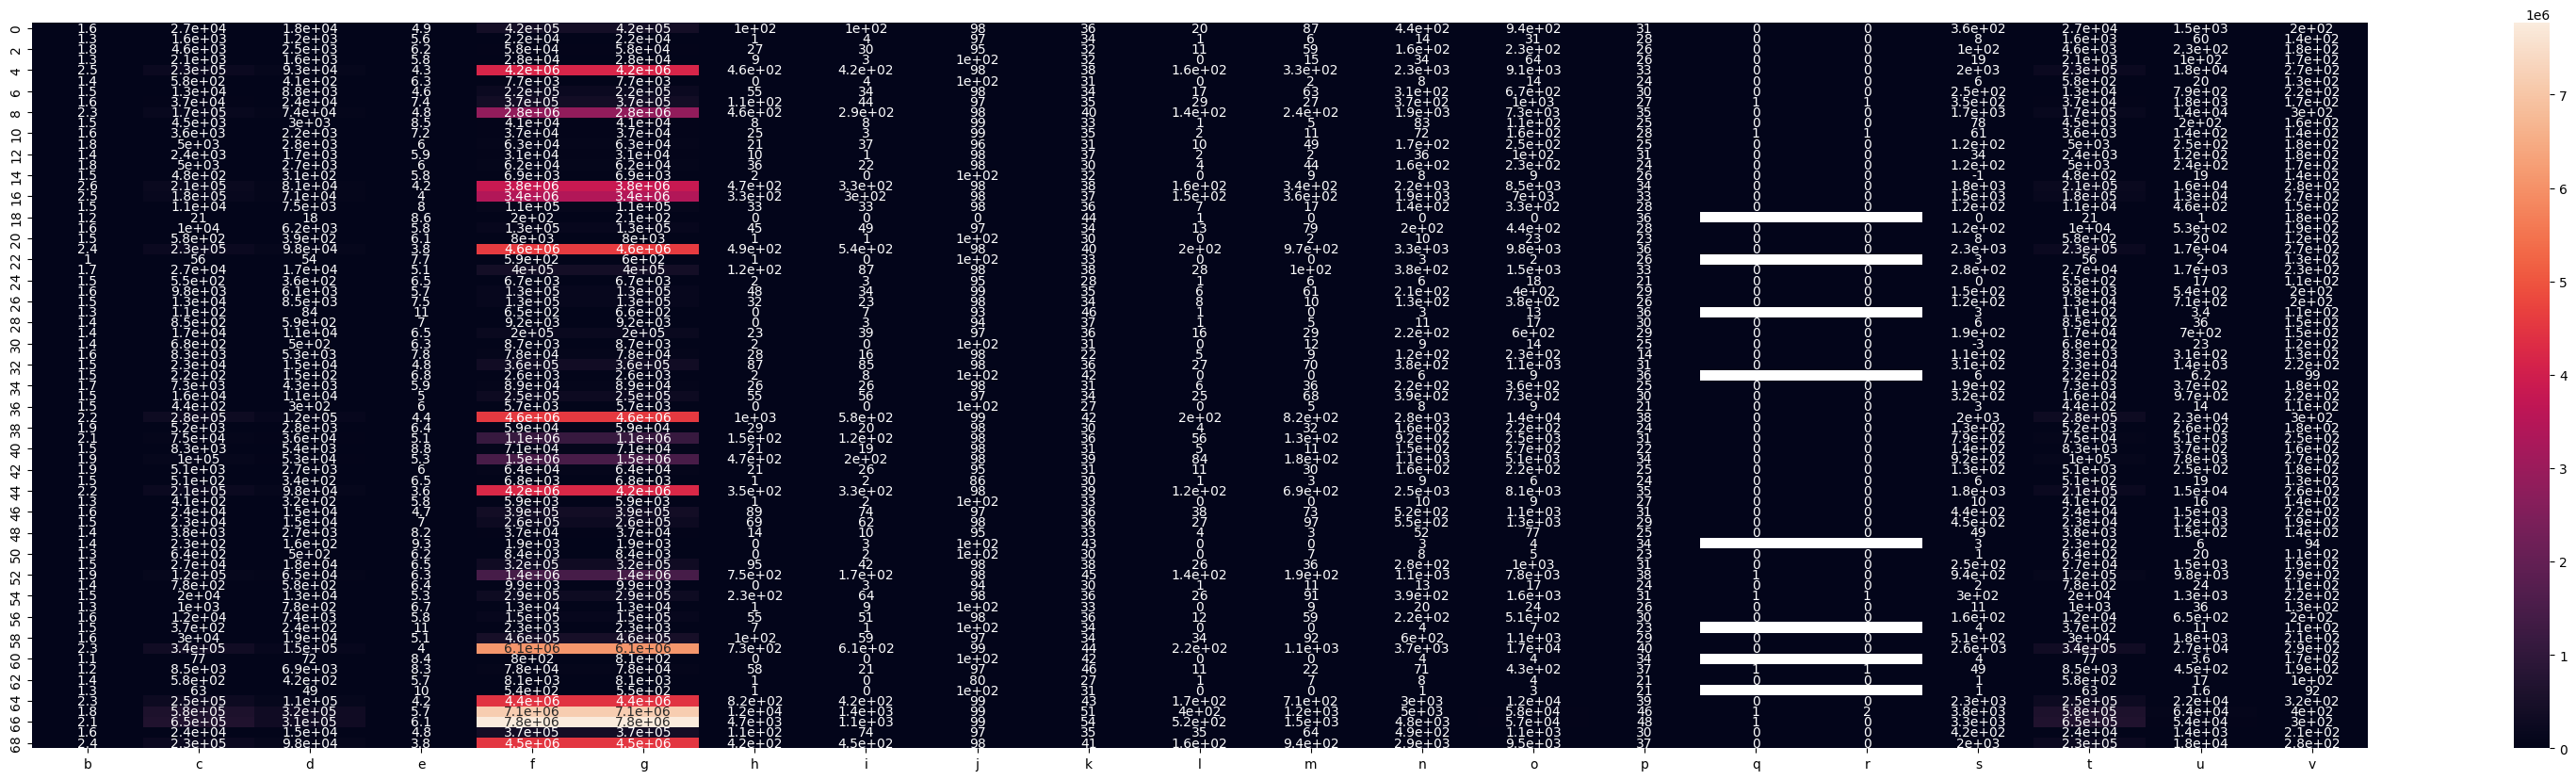

In [32]:
plt.figure(figsize=(40,10))
sns.heatmap(data=train_data, annot=True)

In [3]:
train_data.isnull().sum()

b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
j    0
k    0
l    0
m    0
n    0
o    0
p    0
q    8
r    8
s    0
t    0
u    0
v    0
dtype: int64

In [10]:
train_data=train_data.interpolate(method='linear',limit_direction='forward')

In [14]:
xgb =  GradientBoostingRegressor(random_state=0)
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,cv=5)
grid_search.fit(train_data, train_target)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300]})

In [16]:
test_data=pd.read_csv('/kaggle/input/anyas-gojo-revival/sheet2.csv')
test_data.pop('id')
test_data.pop('a')
test_data['v']=test_data['v'].apply(lambda x:int(x.split(":")[2])+int(x.split(":")[1])*60+int(x.split(":")[0])*3600)
test_data=test_data.interpolate(method='linear',limit_direction='forward')
arr=grid_search.predict(test_data)
print(arr)


[1.57649136 6.87660418 0.28027524 ... 7.02425347 1.4905119  3.25577545]


In [17]:
len(arr)

1064

In [20]:
submission = pd.DataFrame({'Id': range(1,len(arr)+1), 'target': arr})
print(submission)
submission.to_csv('submission1.csv', index=False)

        Id    target
0        1  1.576491
1        2  6.876604
2        3  0.280275
3        4  0.225960
4        5  4.876274
...    ...       ...
1059  1060  0.225070
1060  1061  9.502837
1061  1062  7.024253
1062  1063  1.490512
1063  1064  3.255775

[1064 rows x 2 columns]
